In [1]:
#importar las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium   
import geopandas as gpd
from textwrap import wrap

# Indicadores de seguridad
---

loremp ipsum

In [2]:
df_seguridad=pd.read_csv('data/IndicadoresIPS/seguridad.csv')#leer el archivo csv
df_seguridad.rename(columns={'Textbox6':'Valor',
                               'Fecha':'Periodo'},
                                 inplace=True)#renombrar las columnas
df_seguridad

,Indicador,CodDepto,Departamento,Factor,UnidadMedida,Periodo,Numerador,Denominador,Valor
0,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2017-06,1.0,298.0,3.36
1,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2017-12,0.0,1051.0,0.00
2,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2018-06,0.0,2063.0,0.00
3,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2018-12,0.0,3545.0,0.00
4,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2019-06,2.0,4303.0,0.46
...,...,...,...,...,...,...,...,...,...
6018,Proporción de reingreso de pacientes al servic...,99,Vichada,100,Porcentaje,2020-06,24.0,1699.0,1.41
6019,Proporción de reingreso de pacientes al servic...,99,Vichada,100,Porcentaje,2020-12,21.0,1204.0,1.74
6020,Proporción de reingreso de pacientes al servic...,99,Vichada,100,Porcentaje,2021-06,21.0,1106.0,1.90
6021,Proporción de reingreso de pacientes al servic...,99,Vichada,100,Porcentaje,2021-12,9.0,874.0,1.03


## Selección de indicadores:

In [3]:
df_seguridad["Indicador"].unique()


array(['Tasa de caída de pacientes en el servicio de hospitalización',
       'Tasa de caída de pacientes en el servicio de urgencias',
       'Tasa de caída de pacientes en el servicio de consulta externa',
       'Tasa de caída de pacientes en el servicio de Apoyo Diagnóstico y Complementación Terapéutica.',
       'Proporción de eventos adversos relacionados con la administración de medicamentos en hospitalización',
       'Proporción de eventos adversos relacionados con la administración de medicamentos en urgencias',
       'Tasa de úlceras por presión.',
       'Proporción de cancelación de cirugía',
       'Proporción de reingreso de pacientes al servicio de Urgencias en menos de 72 horas.',
       'Tasa de Incidencia de Infección del Torrente Sanguíneo Asociada a Catéter (ITS- AC)',
       'Tasa de Incidencia de Infección del Tracto Urinario Asociada a Catéter (ISTU-AC)',
       'Tasa de Incidencia de Neumonía Asociada a Ventilador Mecánico (NAV)'],
      dtype=object)

loremp ipsum

In [4]:

ind_Seguridad=['Tasa de caída de pacientes en el servicio de hospitalización',
       'Tasa de caída de pacientes en el servicio de urgencias',
       'Tasa de caída de pacientes en el servicio de consulta externa',
       'Tasa de caída de pacientes en el servicio de Apoyo Diagnóstico y Complementación Terapéutica.',
       'Proporción de cancelación de cirugía',
       'Proporción de reingreso de pacientes al servicio de Urgencias en menos de 72 horas.',
       'Tasa de Incidencia de Infección del Torrente Sanguíneo Asociada a Catéter (ITS- AC)',
       'Tasa de Incidencia de Infección del Tracto Urinario Asociada a Catéter (ISTU-AC)',
       'Tasa de Incidencia de Neumonía Asociada a Ventilador Mecánico (NAV)'
]
df_seguridad=df_seguridad[df_seguridad["Indicador"].isin(ind_Seguridad)]

### Tipos de datos

In [5]:
columnas=['Valor','Numerador','Denominador']
for c in columnas:
    df_seguridad[c]=df_seguridad[c].astype(float)

/tmp/ipykernel_13839/644797256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seguridad[c]=df_seguridad[c].astype(float)


## Proporciones por departamentos

lorem ipsum

```python

In [6]:
indicadores_proporciones=['Proporción de cancelación de cirugía',
       'Proporción de reingreso de pacientes al servicio de Urgencias en menos de 72 horas.',]#lista de los indicadores de proporciones en efectividad
df_proporciones_se_dep=df_seguridad[df_seguridad["Indicador"].isin(indicadores_proporciones)]#seleccionar los registros que corresponden a los indicadores de proporciones
df_proporciones_se_dep=df_proporciones_se_dep[['Indicador','Departamento','Factor','Periodo','Numerador','Denominador']]# seleccionar las columnas de interés
df_proporciones_se_dep=df_proporciones_se_dep.groupby(['Indicador','Departamento','Factor','Periodo']).sum().reset_index()#agrupar por indicador, departamento y periodo
df_proporciones_se_dep['Departamento']=df_proporciones_se_dep['Departamento'].str.upper()#convertir a mayúsculas el nombre del departamento
df_proporciones_se_dep.head()

,Indicador,Departamento,Factor,Periodo,Numerador,Denominador
0,Proporción de cancelación de cirugía,AMAZONAS,100,2017-06,0.0,883.0
1,Proporción de cancelación de cirugía,AMAZONAS,100,2017-12,0.0,191.0
2,Proporción de cancelación de cirugía,AMAZONAS,100,2018-06,0.0,206.0
3,Proporción de cancelación de cirugía,AMAZONAS,100,2018-12,2.0,293.0
4,Proporción de cancelación de cirugía,AMAZONAS,100,2019-06,11.0,352.0


In [7]:
proporcion_seleccionada=indicadores_proporciones[0]#seleccionar un indicador para realizar el mapa
df_mapa=df_proporciones_se_dep[df_proporciones_se_dep['Indicador']==proporcion_seleccionada]#seleccionar un indicador para realizar el mapa
periodos=df_mapa['Periodo'].unique()#obtener los periodos
periodo_seleccionado=periodos[6]#seleccionar un periodo para realizar el mapa
df_mapa=df_mapa[df_mapa['Periodo']==periodo_seleccionado]#seleccionar un periodo para realizar el mapa

loremp ipsum

```

In [8]:
df_mapa=df_mapa.groupby('Departamento').sum().reset_index()#agrupar por departamento y calcular el promedio de los indicadores
df_mapa['Valor Departamental(%)']=round((df_mapa['Numerador']/df_mapa['Denominador'])*100,3)#calcular el valor nacional
df_mapa.head()

/tmp/ipykernel_13839/350925881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mapa=df_mapa.groupby('Departamento').sum().reset_index()#agrupar por departamento y calcular el promedio de los indicadores


,Departamento,Factor,Numerador,Denominador,Valor Departamental(%)
0,AMAZONAS,100,0.0,141.0,0.000
1,ANTIOQUIA,100,1535.0,53236.0,2.883
2,ARAUCA,100,5.0,976.0,0.512
3,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",100,7.0,454.0,1.542
4,ATLÁNTICO,100,163.0,24195.0,0.674


In [9]:
data_json= gpd.read_file('./data/Colombia_departamentos_poblacion.geojson', driver = "GeoJSON")#leer el archivo geojson
data_json=data_json.join(df_mapa.set_index('Departamento'), on='DPTO_CNMBR', how='left')#unir el archivo geojson con el dataframe de los indicadores
map = folium.Map(location=[4.570868, -74.297333],zoom_start=6)#crear el mapa

cp=folium.Choropleth(#crear el mapa coroplético
    geo_data=data_json,
    data=df_mapa,
    columns=['Departamento', 'Valor Departamental(%)'],
    key_on='feature.properties.DPTO_CNMBR',
    legend_name='Valor Departamental(%)',
    fill_color='BuPu',
    fill_opacity=0.8
).add_to(map)

cp.geojson.add_child(folium.GeoJsonTooltip(fields=['DPTO_CNMBR','Valor Departamental(%)'], #agregar el tooltip
                                           aliases=['Departamento','Valor Departamental(%)']))

#Añadir el titulo al mapa
title = '\n'.join(wrap((proporcion_seleccionada + ' en ' + periodo_seleccionado),80))
title_html = """
            <div id='maplegend' class='maplegend' 
            style='position: absolute; z-index:9999; border:10px; background-color:rgba(200, 0, 255, 0.1);
             border-radius:6px; padding: 10px; font-size:15px; left: 15px; top: 700px;'>

            <div class='legend-title'><b>{}</b></div>
            </div>""".format(title)   
map.get_root().html.add_child(folium.Element(title_html))
map


In [10]:
indicador_proporciones=['Proporción de cancelación de cirugía',
       'Proporción de reingreso de pacientes al servicio de Urgencias en menos de 72 horas.']
df_proporciones_se=df_seguridad[df_seguridad["Indicador"].isin(indicador_proporciones)]
df_proporciones_se.head()

,Indicador,CodDepto,Departamento,Factor,UnidadMedida,Periodo,Numerador,Denominador,Valor
126,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2017-06,0.0,883.0,0.00
127,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2017-12,0.0,191.0,0.00
128,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2018-06,0.0,206.0,0.00
129,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2018-12,2.0,293.0,0.68
130,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2019-06,11.0,352.0,3.13


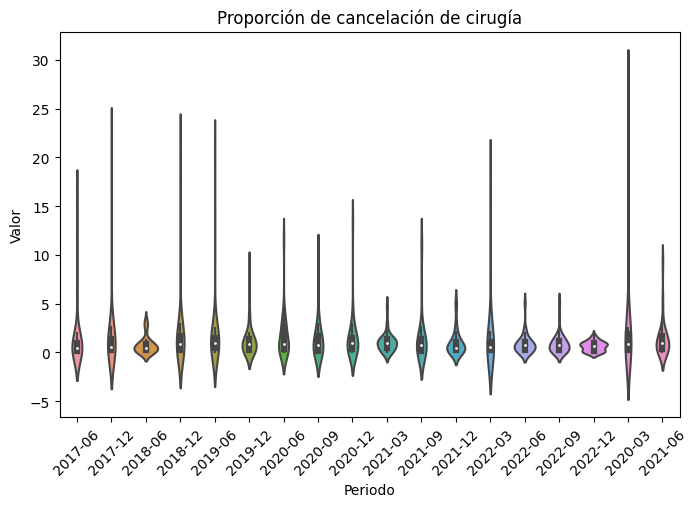

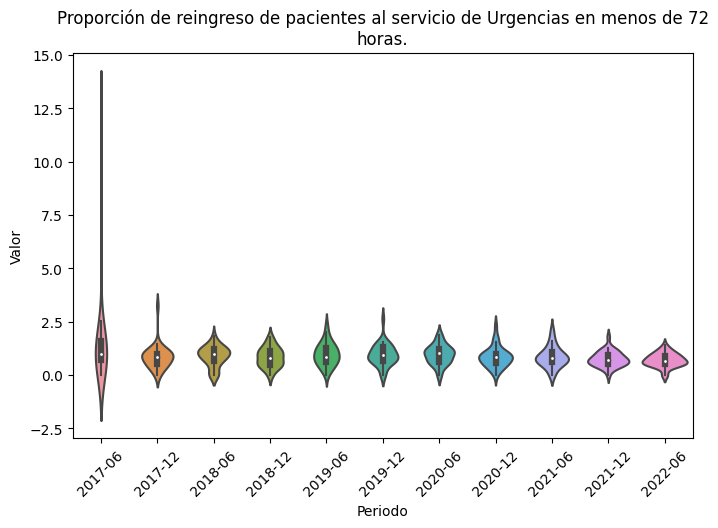

In [11]:
for indicador in indicador_proporciones:
    indicador_nacional=df_proporciones_se[df_proporciones_se["Indicador"]==indicador]
    plt.figure(figsize=(8, 5))
    plt.title('\n'.join(wrap(indicador,80)))
    sns.violinplot(data=indicador_nacional,x=indicador_nacional['Periodo'],y=indicador_nacional['Valor'])
    plt.xticks(rotation=45)
    plt.show()

loremp ipsum

```python

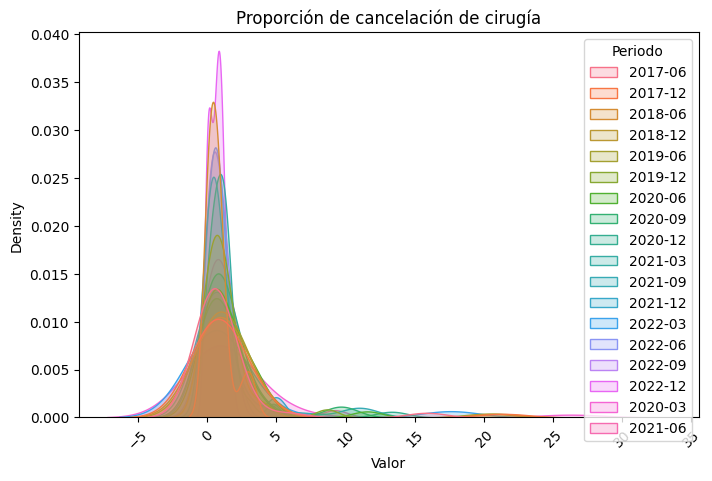

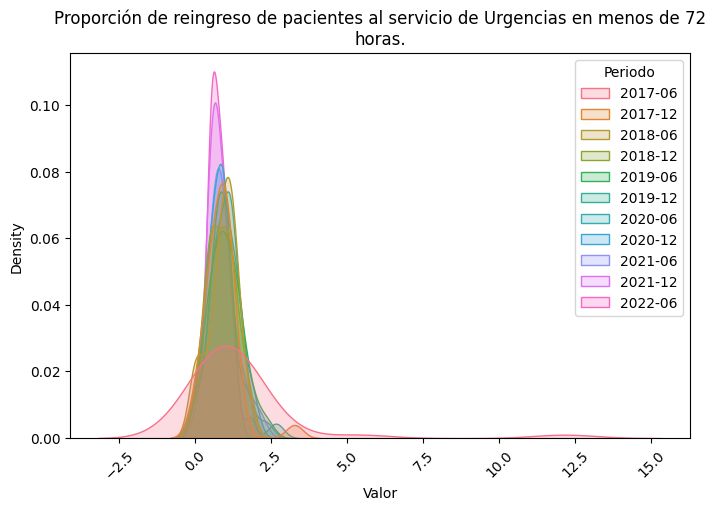

In [12]:
for indicador in indicador_proporciones:
    indicador_nacional=df_proporciones_se[df_proporciones_se["Indicador"]==indicador]
    plt.figure(figsize=(8, 5))
    plt.title('\n'.join(wrap(indicador,80)))
    sns.kdeplot(data=indicador_nacional,x=indicador_nacional['Valor'],hue=indicador_nacional['Periodo'], fill=True)
    plt.xticks(rotation=45)
    plt.show()

## Tasas por departamentos

loremp ipsum

```python

In [13]:
indicadores_tasas=['Tasa de caída de pacientes en el servicio de hospitalización',
       'Tasa de caída de pacientes en el servicio de urgencias',
       'Tasa de caída de pacientes en el servicio de consulta externa',
       'Tasa de caída de pacientes en el servicio de Apoyo Diagnóstico y Complementación Terapéutica.',
       'Tasa de Incidencia de Infección del Torrente Sanguíneo Asociada a Catéter (ITS- AC)',
       'Tasa de Incidencia de Infección del Tracto Urinario Asociada a Catéter (ISTU-AC)',
       'Tasa de Incidencia de Neumonía Asociada a Ventilador Mecánico (NAV)']
df_tasas_se_dep=df_seguridad[df_seguridad["Indicador"].isin(indicadores_tasas)]#seleccionar los registros que corresponden a los indicadores de proporciones
df_tasas_se_dep=df_tasas_se_dep[['Indicador','Departamento','Factor','Periodo','Numerador','Denominador']]# seleccionar las columnas de interés
df_tasas_se_dep=df_tasas_se_dep.groupby(['Indicador','Departamento','Factor','Periodo']).sum().reset_index()#agrupar por indicador, departamento y periodo
df_tasas_se_dep['Departamento']=df_tasas_se_dep['Departamento'].str.upper()#convertir a mayúsculas el nombre del departamento
df_tasas_se_dep.head()

,Indicador,Departamento,Factor,Periodo,Numerador,Denominador
0,Tasa de Incidencia de Infección del Torrente S...,ANTIOQUIA,1000,2016-12,196.0,60472.0
1,Tasa de Incidencia de Infección del Torrente S...,ANTIOQUIA,1000,2017-12,382.0,105557.0
2,Tasa de Incidencia de Infección del Torrente S...,ANTIOQUIA,1000,2018-12,212.0,110498.0
3,Tasa de Incidencia de Infección del Torrente S...,ANTIOQUIA,1000,2019-12,272.0,115251.0
4,Tasa de Incidencia de Infección del Torrente S...,ANTIOQUIA,1000,2020-12,474.0,140007.0


In [14]:
tasa_seleccionada=indicadores_tasas[0]#seleccionar un indicador para realizar el mapa
df_mapa=df_tasas_se_dep[df_tasas_se_dep['Indicador']==tasa_seleccionada]#seleccionar un indicador para realizar el mapa
periodos=df_mapa['Periodo'].unique()#obtener los periodos
periodo_seleccionado=periodos[6]#seleccionar un periodo para realizar el mapa
df_mapa=df_mapa[df_mapa['Periodo']==periodo_seleccionado]#seleccionar un periodo para realizar el mapa


In [15]:
df_mapa=df_mapa.groupby('Departamento').sum().reset_index()#agrupar por departamento y calcular el promedio de los indicadores
df_mapa['Valor Departamental()']=round((df_mapa['Numerador']/df_mapa['Denominador'])*df_mapa['Denominador'],3)#calcular el valor nacional
df_mapa.head()

/tmp/ipykernel_13839/912836359.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mapa=df_mapa.groupby('Departamento').sum().reset_index()#agrupar por departamento y calcular el promedio de los indicadores


,Departamento,Factor,Numerador,Denominador,Valor Departamental()
0,AMAZONAS,1000,0.0,2464.0,0.0
1,ANTIOQUIA,1000,424.0,223888.0,424.0
2,ARAUCA,1000,14.0,7139.0,14.0
3,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",1000,0.0,2853.0,0.0
4,ATLÁNTICO,1000,156.0,164970.0,156.0


In [16]:
data_json= gpd.read_file('./data/Colombia_departamentos_poblacion.geojson', driver = "GeoJSON")
data_json=data_json.join(df_mapa.set_index('Departamento'), on='DPTO_CNMBR', how='left')
map = folium.Map(location=[4.570868, -74.297333],zoom_start=6)
cp=folium.Choropleth(
    geo_data=data_json,
    data=df_mapa,
    columns=['Departamento', 'Valor Departamental()'],
    key_on='feature.properties.DPTO_CNMBR',
    legend_name='Valor Departamental()',
    fill_color='BuPu',
    fill_opacity=0.8
).add_to(map)

cp.geojson.add_child(folium.GeoJsonTooltip(fields=['DPTO_CNMBR','Valor Departamental()'], #agregar el tooltip
                                           aliases=['Departamento','Valor Departamental()']))

#Añadir el titulo al mapa
title = '\n'.join(wrap((tasa_seleccionada + ' en ' + periodo_seleccionado),80))
title_html = """
            <div id='maplegend' class='maplegend' 
            style='position: absolute; z-index:9999; border:10px; background-color:rgba(200, 0, 255, 0.1);
             border-radius:6px; padding: 10px; font-size:15px; left: 15px; top: 700px;'>

            <div class='legend-title'><b>{}</b></div>
            </div>""".format(title)   
map.get_root().html.add_child(folium.Element(title_html))
map

In [17]:
indicadores_tasas=['Tasa de caída de pacientes en el servicio de hospitalización',
       'Tasa de caída de pacientes en el servicio de urgencias',
       'Tasa de caída de pacientes en el servicio de consulta externa',
       'Tasa de caída de pacientes en el servicio de Apoyo Diagnóstico y Complementación Terapéutica.',
       'Tasa de Incidencia de Infección del Torrente Sanguíneo Asociada a Catéter (ITS- AC)',
       'Tasa de Incidencia de Infección del Tracto Urinario Asociada a Catéter (ISTU-AC)',
       'Tasa de Incidencia de Neumonía Asociada a Ventilador Mecánico (NAV)']
df_tasas_se=df_seguridad[df_seguridad["Indicador"].isin(indicadores_tasas)]#seleccionar los registros que corresponden a los indicadores de proporciones
df_tasas_se.head()

,Indicador,CodDepto,Departamento,Factor,UnidadMedida,Periodo,Numerador,Denominador,Valor
0,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2017-06,1.0,298.0,3.36
1,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2017-12,0.0,1051.0,0.00
2,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2018-06,0.0,2063.0,0.00
3,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2018-12,0.0,3545.0,0.00
4,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2019-06,2.0,4303.0,0.46


lorem ipsum

```

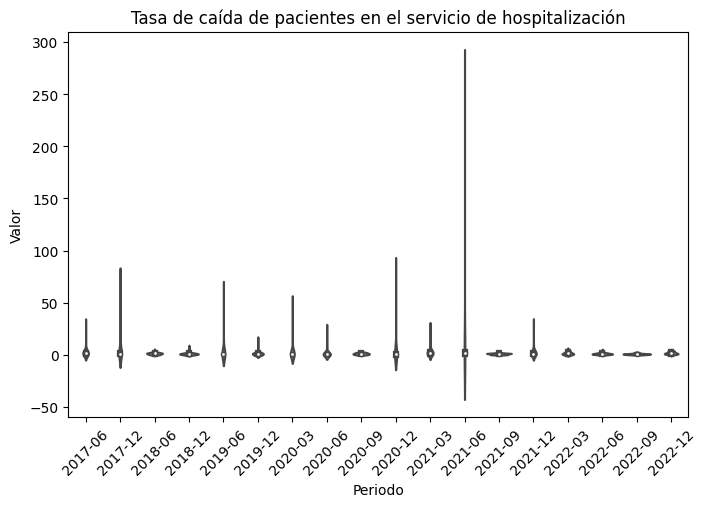

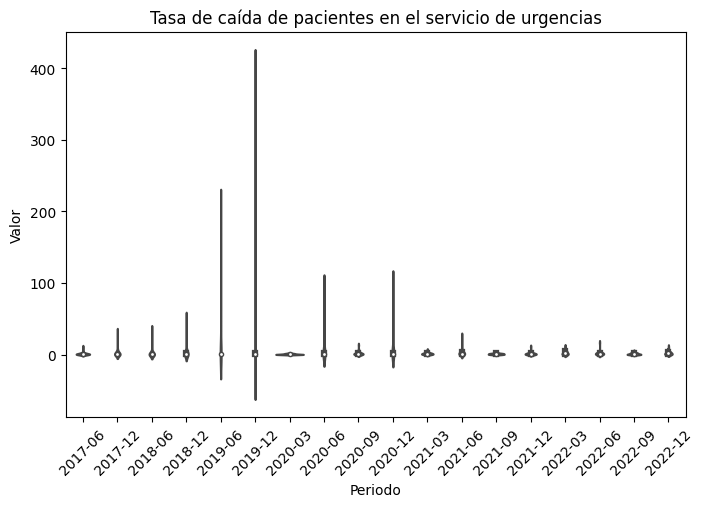

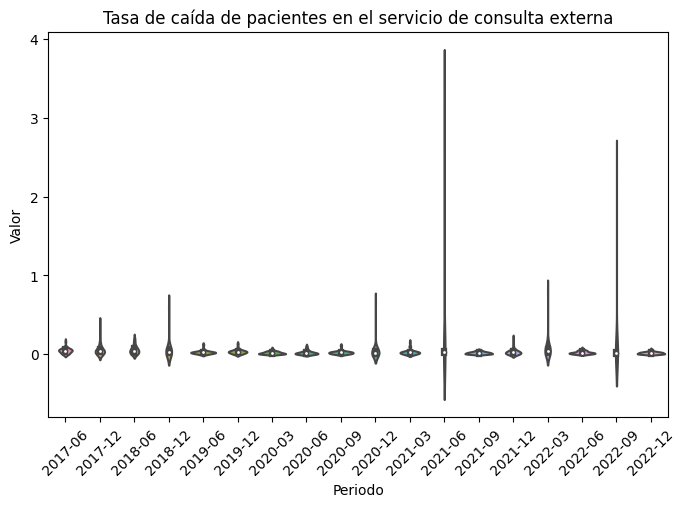

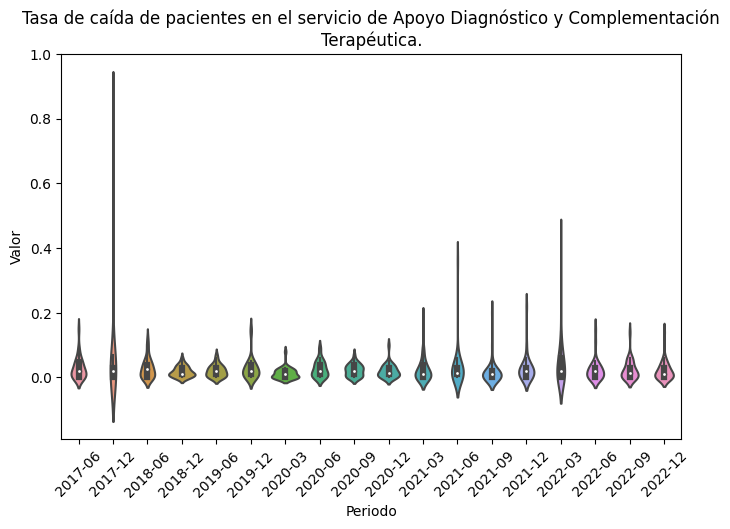

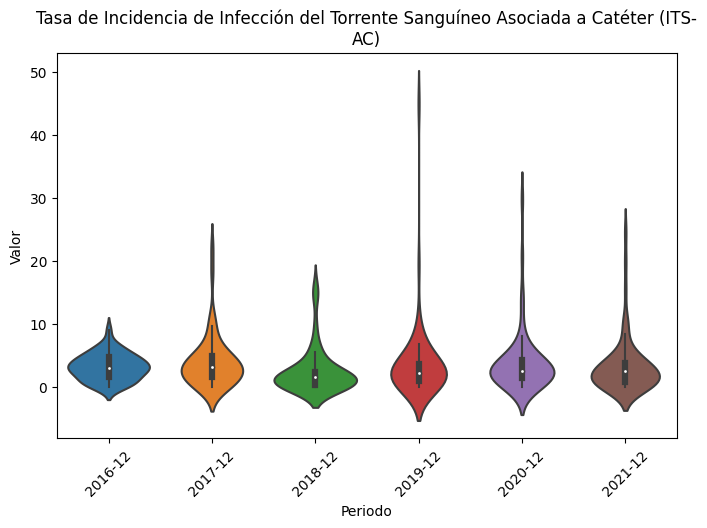

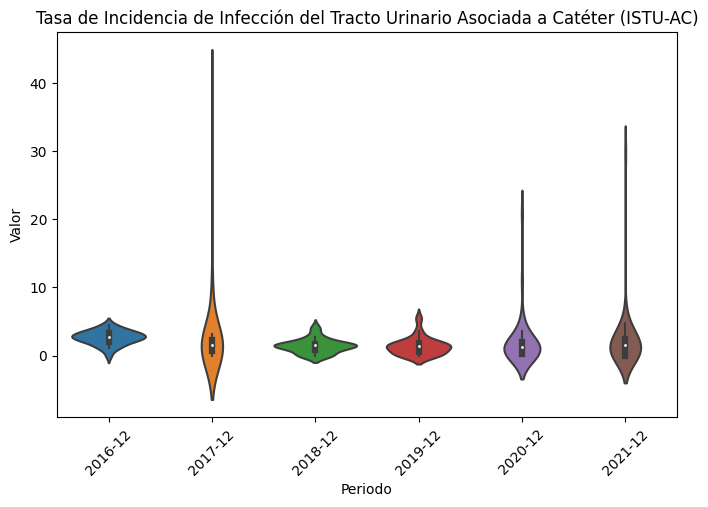

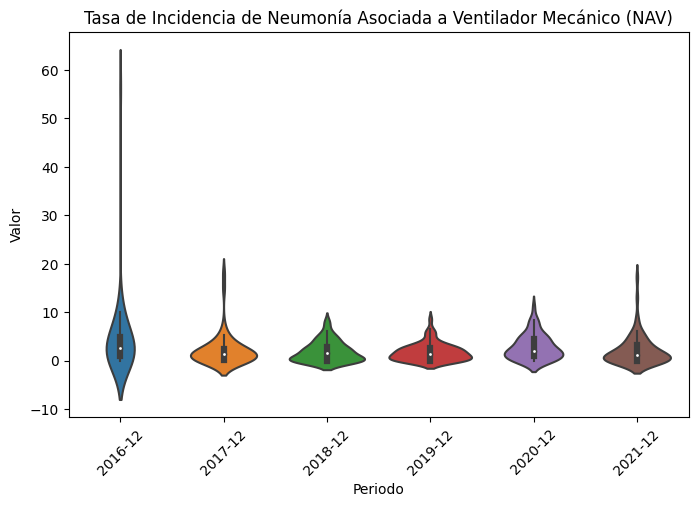

In [18]:
for indicador in indicadores_tasas:
    indicador_nacional=df_tasas_se[df_tasas_se["Indicador"]==indicador]
    plt.figure(figsize=(8, 5))
    plt.title('\n'.join(wrap(indicador,80)))
    sns.violinplot(data=indicador_nacional,x=indicador_nacional['Periodo'],y=indicador_nacional['Valor'])
    plt.xticks(rotation=45)
    plt.show()

loremp ipsum

```python

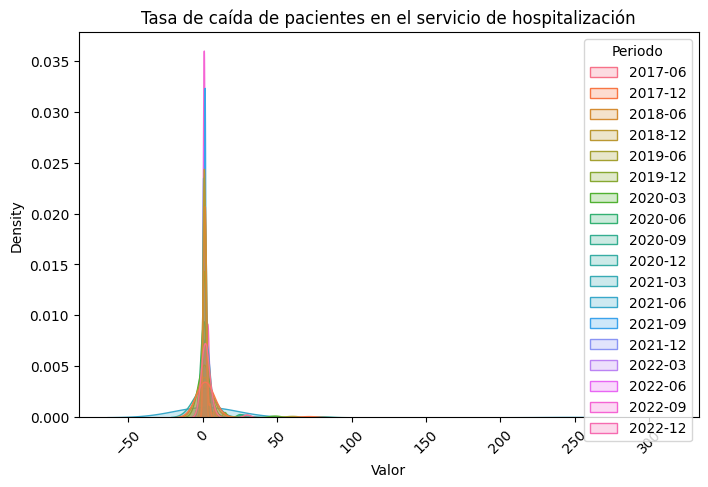

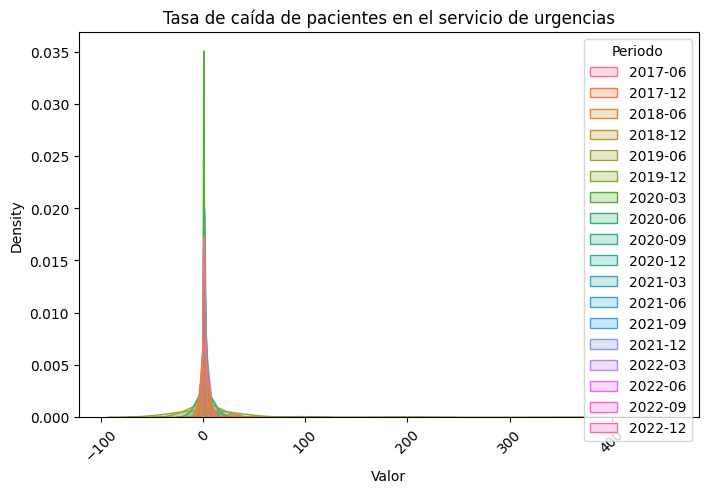

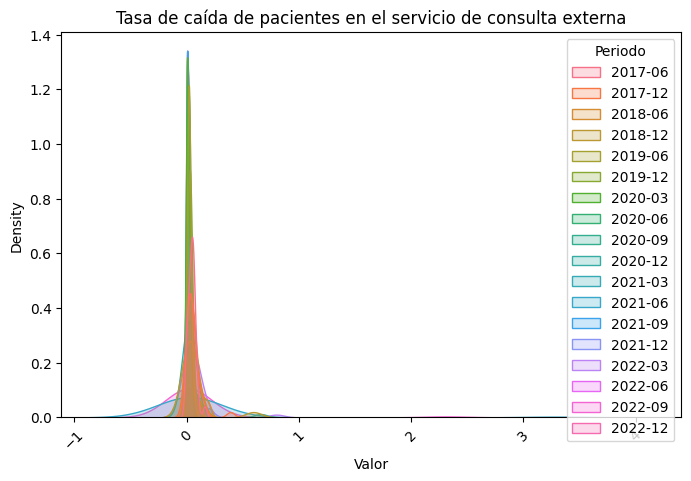

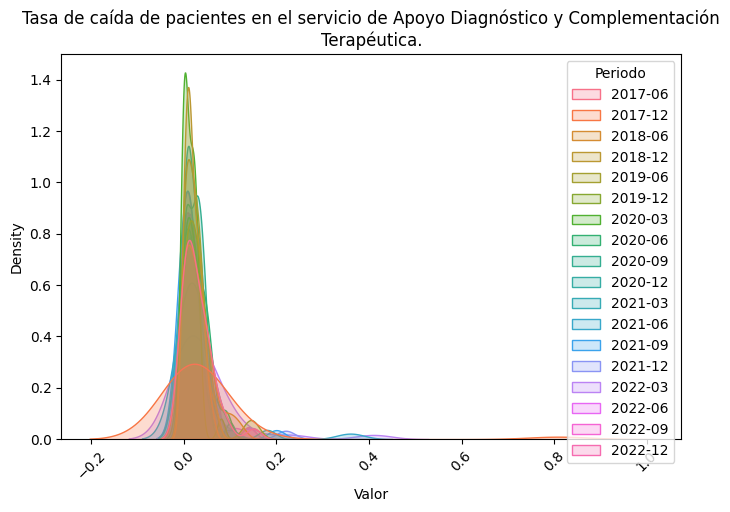

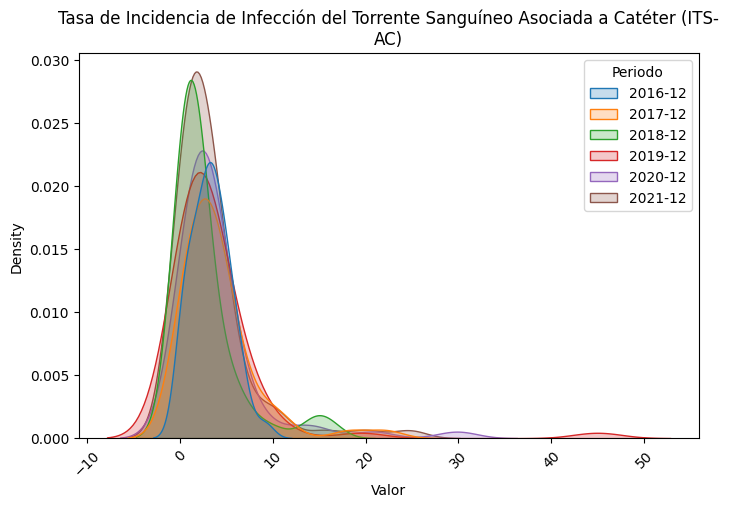

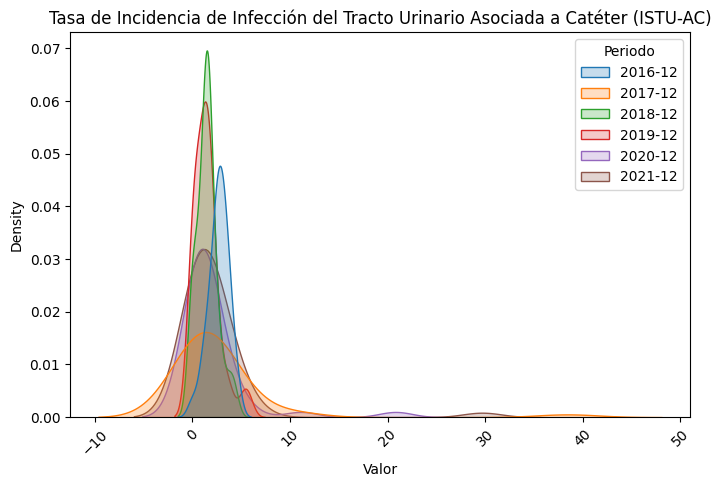

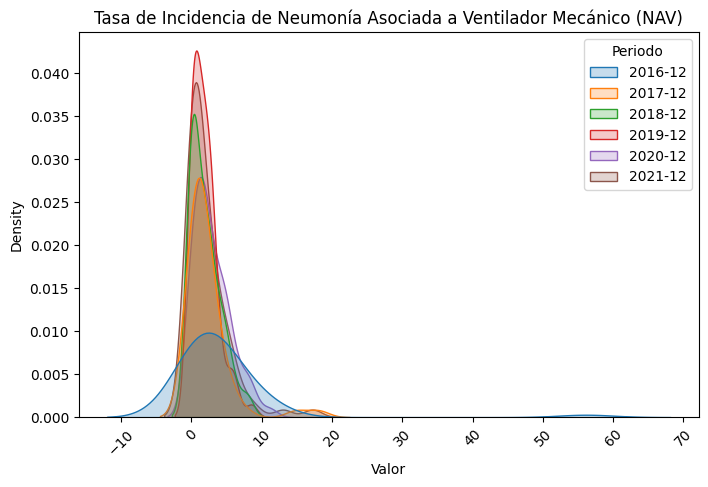

In [19]:
for indicador in indicadores_tasas:
    indicador_nacional=df_tasas_se[df_tasas_se["Indicador"]==indicador]
    plt.figure(figsize=(8, 5))
    plt.title('\n'.join(wrap(indicador,80)))
    sns.kdeplot(data=indicador_nacional,x=indicador_nacional['Valor'],hue=indicador_nacional['Periodo'], fill=True)
    plt.xticks(rotation=45)
    plt.show()

---
## Calculo de indicadores a nivel nacional

loremp ipsum

```python

In [20]:
indicador_proporciones=['Proporción de cancelación de cirugía',
       'Proporción de reingreso de pacientes al servicio de Urgencias en menos de 72 horas.']
df_proporciones_se=df_seguridad[df_seguridad["Indicador"].isin(indicador_proporciones)]
df_proporciones_se.head()

,Indicador,CodDepto,Departamento,Factor,UnidadMedida,Periodo,Numerador,Denominador,Valor
126,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2017-06,0.0,883.0,0.00
127,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2017-12,0.0,191.0,0.00
128,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2018-06,0.0,206.0,0.00
129,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2018-12,2.0,293.0,0.68
130,Proporción de cancelación de cirugía,91,Amazonas,100,Porcentaje,2019-06,11.0,352.0,3.13


loremp ipsum

```python

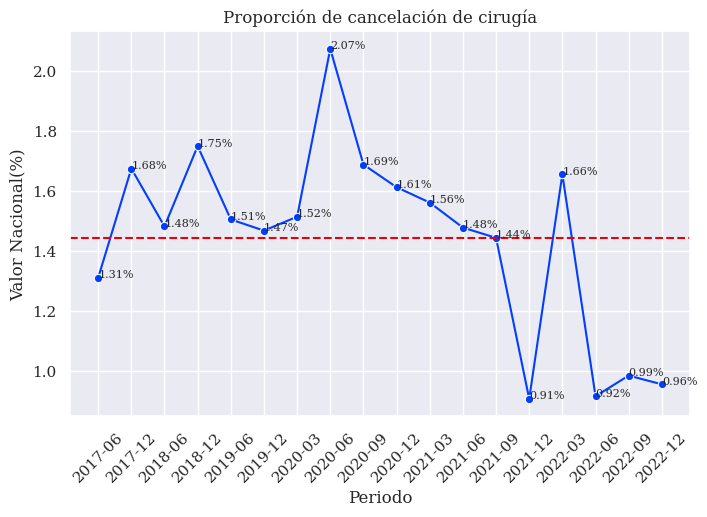

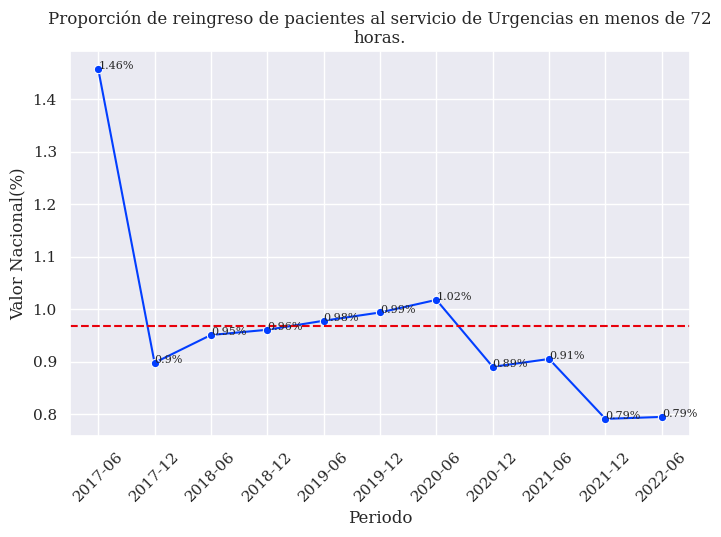

In [21]:
sns.set_theme(context='notebook', style='darkgrid', palette='bright', font='serif', font_scale=1, color_codes=True, rc=None)
for indicador in indicador_proporciones:
    indicador_nacional=df_proporciones_se[df_proporciones_se["Indicador"]==indicador]
    indicador_nacional=indicador_nacional[['Indicador','Factor','UnidadMedida','Periodo','Numerador','Denominador']].groupby(['Indicador','UnidadMedida','Factor','Periodo']).sum().reset_index()
    indicador_nacional['Valor Nacional(%)']=(indicador_nacional['Numerador']/indicador_nacional['Denominador'])*indicador_nacional['Factor']
    plt.figure(figsize=(8, 5))
    plt.title('\n'.join(wrap(indicador,80)))
    sns.lineplot(x='Periodo', y='Valor Nacional(%)',data=indicador_nacional, marker='o')
    plt.xticks(rotation=45)
    font = {'family': 'serif',
            'weight': 'normal',
            'size': 8}

    for index, row in indicador_nacional.iterrows():
        plt.text(row['Periodo'], row['Valor Nacional(%)'], str(round(row['Valor Nacional(%)'],2))+"%", ha='left',fontdict=font)
    plt.axhline(y=indicador_nacional['Valor Nacional(%)'].mean(), color='r', linestyle='--')
    plt.show()

lorem ipsum

```python

In [22]:
indicadores_tasas=['Tasa de caída de pacientes en el servicio de hospitalización',
       'Tasa de caída de pacientes en el servicio de urgencias',
       'Tasa de caída de pacientes en el servicio de consulta externa',
       'Tasa de caída de pacientes en el servicio de Apoyo Diagnóstico y Complementación Terapéutica.',
       'Tasa de Incidencia de Infección del Torrente Sanguíneo Asociada a Catéter (ITS- AC)',
       'Tasa de Incidencia de Infección del Tracto Urinario Asociada a Catéter (ISTU-AC)',
       'Tasa de Incidencia de Neumonía Asociada a Ventilador Mecánico (NAV)']
df_tasas_se=df_seguridad[df_seguridad["Indicador"].isin(indicadores_tasas)]#seleccionar los registros que corresponden a los indicadores de proporciones
df_tasas_se.head()

,Indicador,CodDepto,Departamento,Factor,UnidadMedida,Periodo,Numerador,Denominador,Valor
0,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2017-06,1.0,298.0,3.36
1,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2017-12,0.0,1051.0,0.00
2,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2018-06,0.0,2063.0,0.00
3,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2018-12,0.0,3545.0,0.00
4,Tasa de caída de pacientes en el servicio de h...,91,Amazonas,1000,Tasa,2019-06,2.0,4303.0,0.46


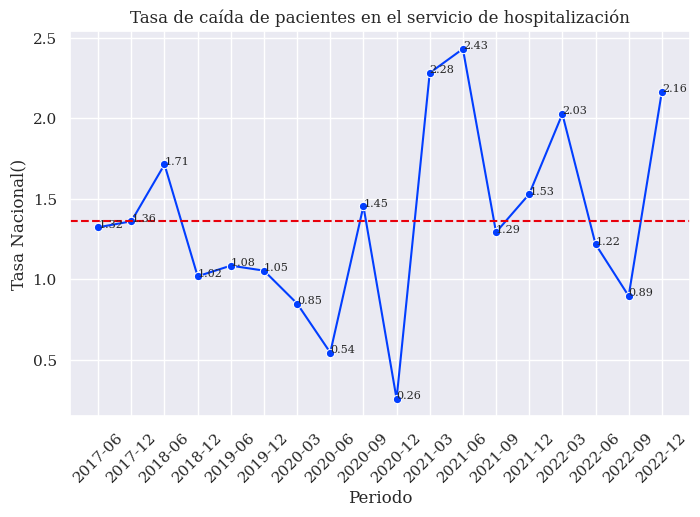

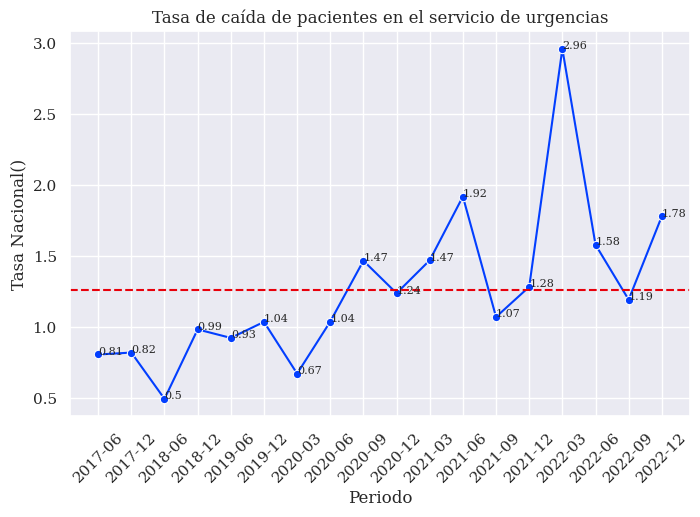

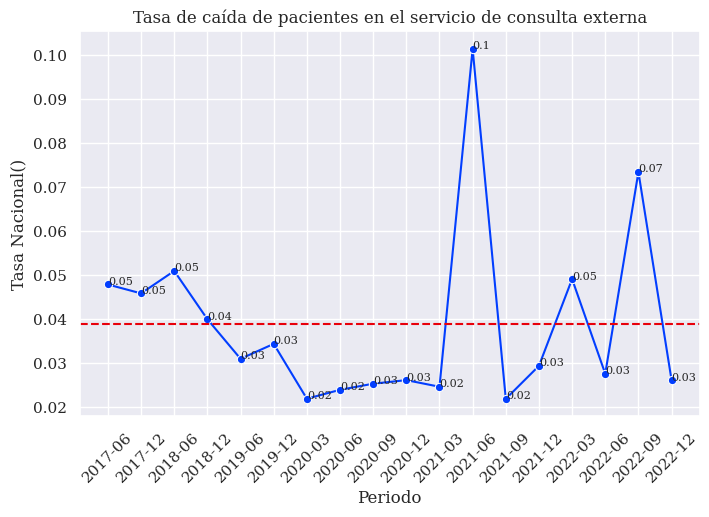

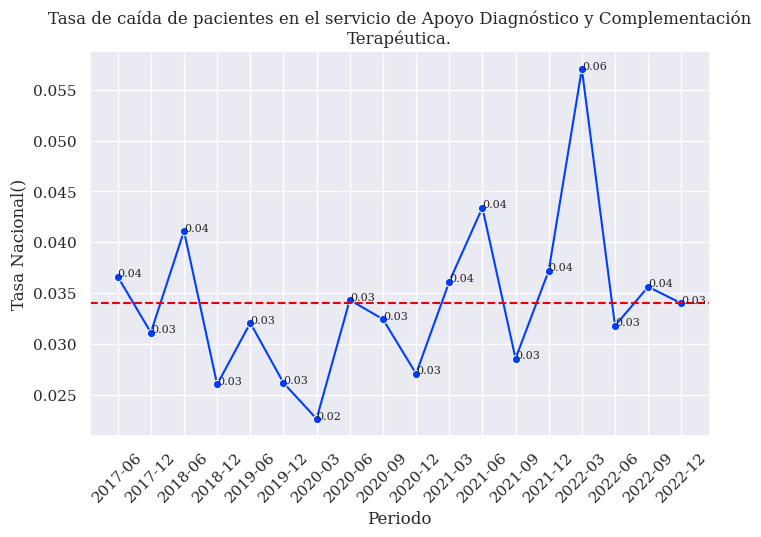

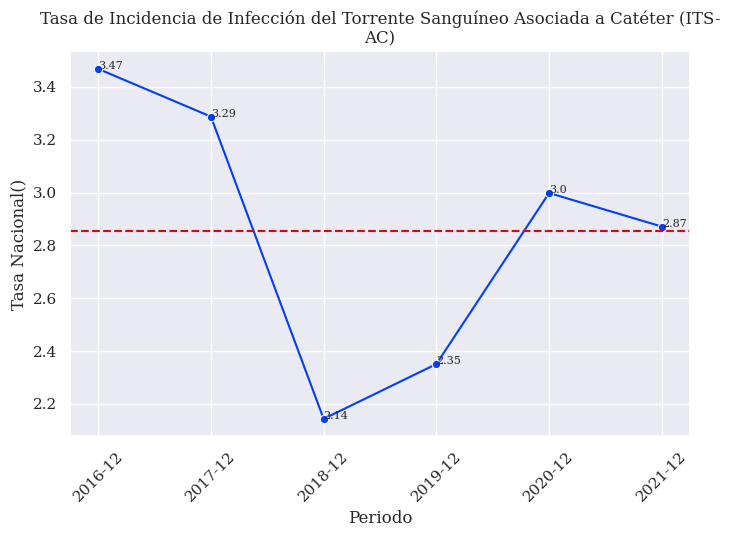

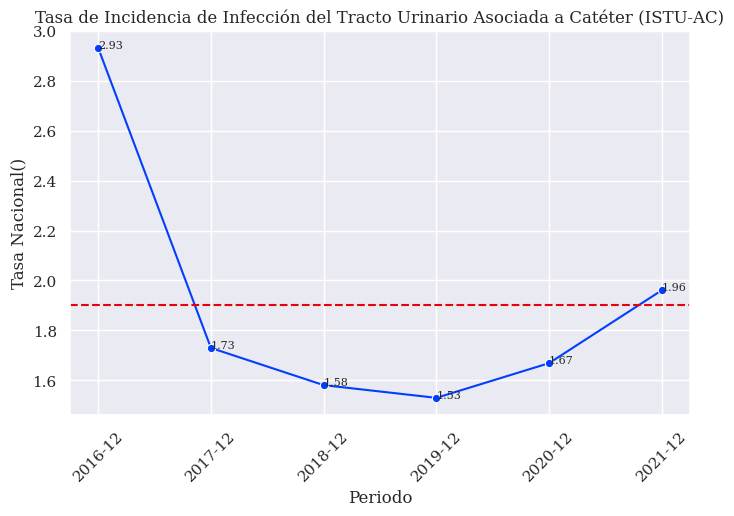

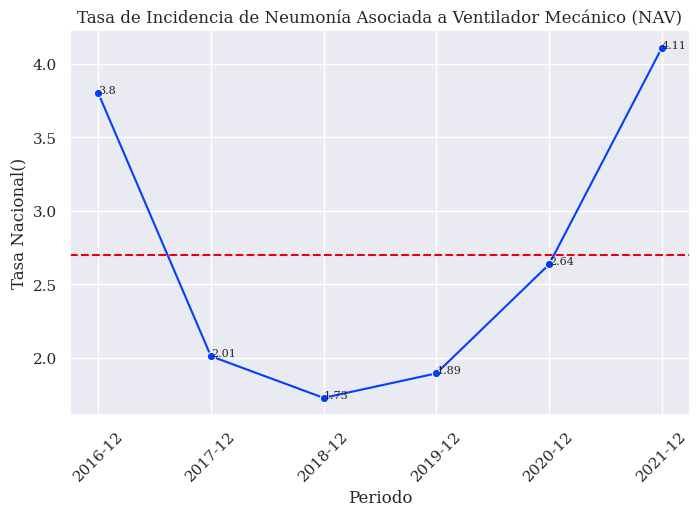

In [23]:
sns.set_theme(context='notebook', style='darkgrid', palette='bright', font='serif', font_scale=1, color_codes=True, rc=None)
for indicador in indicadores_tasas:
    indicador_nacional=df_tasas_se[df_tasas_se["Indicador"]==indicador]
    indicador_nacional=indicador_nacional[['Indicador','Factor','UnidadMedida','Periodo','Numerador','Denominador']].groupby(['Indicador','UnidadMedida','Factor','Periodo']).sum().reset_index()
    indicador_nacional['Tasa Nacional()']=(indicador_nacional['Numerador']/indicador_nacional['Denominador'])*indicador_nacional['Factor']
    plt.figure(figsize=(8, 5))
    plt.title('\n'.join(wrap(indicador,80)))
    sns.lineplot(x='Periodo', y='Tasa Nacional()',data=indicador_nacional, marker='o')
    plt.xticks(rotation=45)
    font = {'family': 'serif',
            'size': 8}
    for index, row in indicador_nacional.iterrows():
        plt.text(row['Periodo'], row['Tasa Nacional()'], str(round(row['Tasa Nacional()'],2)), ha='left',fontdict=font)
    plt.axhline(y=indicador_nacional['Tasa Nacional()'].mean(), color='r', linestyle='--')
    plt.show()

### Resumen de los indicadores nacionales en mapas de calor

loremp ipsum

```python

([<matplotlib.axis.XTick at 0x7fb4a248d3c0>,
 [Text(0.5, 0, 'Proporción de cancelación de cirugía'),
  Text(1.5, 0, 'Proporción de reingreso de pacientes al servicio\nde Urgencias en menos de 72 horas.')])

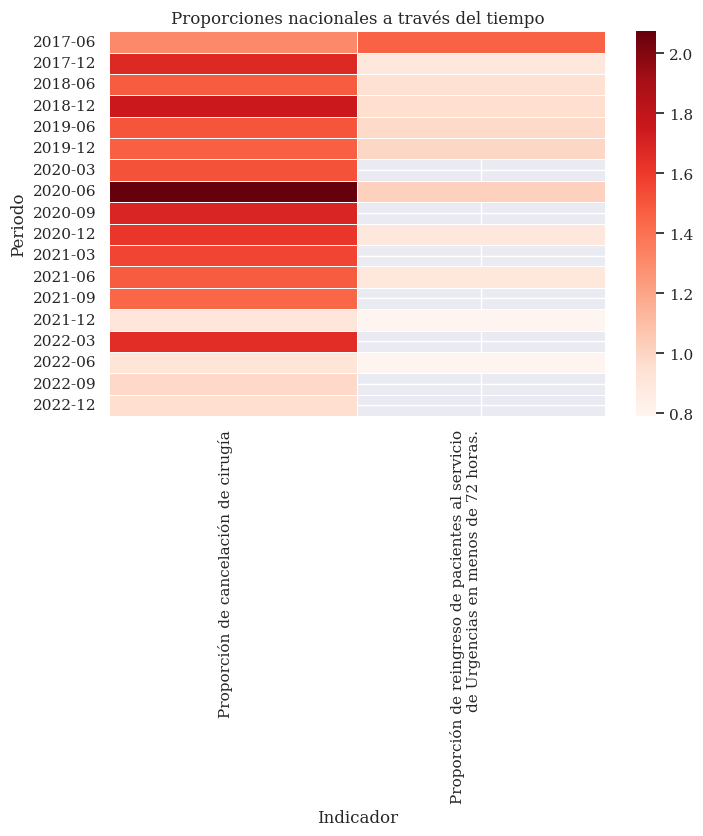

In [24]:
df=df_proporciones_se[['Indicador','Factor','UnidadMedida','Periodo','Numerador','Denominador']].groupby(['Indicador','UnidadMedida','Factor','Periodo']).sum().reset_index()
df['Valor nacional(%)']=(df['Numerador']/df['Denominador'])*df['Factor']
pivot=pd.pivot_table(df,index='Periodo',columns='Indicador',values='Valor nacional(%)')
plt.figure(figsize=(8, 5))
title='Proporciones nacionales a través del tiempo'
plt.title('\n'.join(wrap(title,50)))
sns.heatmap(pivot, cmap="Reds", linewidths=.5, xticklabels=True, yticklabels=True)
xlabels = ['\n'.join(wrap(l.get_text(), 50)) for l in plt.gca().get_xticklabels()]
plt.xticks(ticks=plt.xticks()[0], labels=xlabels, ha='right')

([<matplotlib.axis.XTick at 0x7fb4dc30eec0>,
 [Text(0.5, 0, 'Tasa de Incidencia de Infección del\nTorrente Sanguíneo Asociada a Catéter\n(ITS- AC)'),
  Text(1.5, 0, 'Tasa de Incidencia de Infección del\nTracto Urinario Asociada a Catéter\n(ISTU-AC)'),
  Text(2.5, 0, 'Tasa de Incidencia de Neumonía Asociada\na Ventilador Mecánico (NAV)'),
  Text(3.5, 0, 'Tasa de caída de pacientes en el\nservicio de Apoyo Diagnóstico y\nComplementación Terapéutica.'),
  Text(4.5, 0, 'Tasa de caída de pacientes en el\nservicio de consulta externa'),
  Text(5.5, 0, 'Tasa de caída de pacientes en el\nservicio de hospitalización'),
  Text(6.5, 0, 'Tasa de caída de pacientes en el\nservicio de urgencias')])

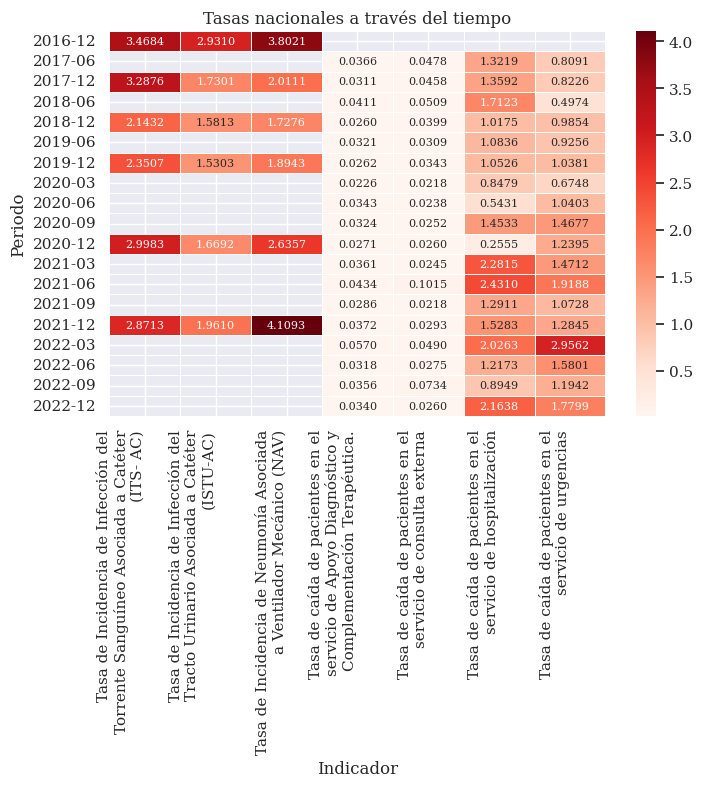

In [25]:
df=df_tasas_se[['Indicador','Factor','UnidadMedida','Periodo','Numerador','Denominador']].groupby(['Indicador','UnidadMedida','Factor','Periodo']).sum().reset_index()
df['Valor nacional(días)']=(df['Numerador']/df['Denominador'])*df['Factor']
pivot=pd.pivot_table(df,index='Periodo',columns='Indicador',values='Valor nacional(días)')
plt.figure(figsize=(8, 5))
title='Tasas nacionales a través del tiempo'
plt.title('\n'.join(wrap(title,80)))
sns.heatmap(pivot, cmap="Reds", annot=True, fmt=".4f", linewidths=.5, xticklabels=True, yticklabels=True,annot_kws={"size": 8})
xlabels = ['\n'.join(wrap(l.get_text(), 40)) for l in plt.gca().get_xticklabels()]
plt.xticks(ticks=plt.xticks()[0], labels=xlabels, ha='right')

## Prediccion de valores futuros mediante ajuste polinomial

In [26]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
grados=pd.DataFrame(columns=['Indicador','Grado','Error total'])
for indicador in indicador_proporciones:
    indicador_nacional=df_proporciones_se[df_proporciones_se["Indicador"]==indicador]
    indicador_nacional=indicador_nacional[['Indicador','Factor','UnidadMedida','Periodo','Numerador','Denominador']].groupby(['Indicador','UnidadMedida','Factor','Periodo']).sum().reset_index()
    indicador_nacional['Valor Nacional(%)']=(indicador_nacional['Numerador']/indicador_nacional['Denominador'])*indicador_nacional['Factor']
    x=indicador_nacional['Periodo']
    y=indicador_nacional['Valor Nacional(%)']
    x=pd.to_datetime(x, format='%Y-%m-%d',errors='coerce')
    x=x.dt.year
    a=x.groupby(x).count()
    i=-1
    add=0
    for index, value in x.iteritems():
        if i==-1 or i==value:
            x.iloc[index]=x.loc[index]+add
            add+=(1/float(a.loc[value]))
            i=value
            continue
        i=value
        add=(1/float(a.loc[value]))
    x_test=x.iloc[len(x)-1]
    y_test=y.iloc[len(y)-1]
    x_train=x.drop(len(x)-1)
    y_train=y.drop(len(x)-1)

    errorsMSE=pd.Series(dtype=float)
    errors=pd.Series(dtype=float)
    for i in range(0,59):
        periodo=x_test# x que se va a predecir
        coef=np.polyfit(x_train, y_train, i)# polino del grado i
        p=np.polyval(coef,periodo)# prediccion con el polinomio del grado i
        if p<0:# si la prediccion es negativa se pone en 0
            p=0
        if p>100:# si la prediccion es mayor a 100 se pone en 100
            p=99.99
        
        y_pred=pd.Series(dtype=float)# serie de prediccion
        for index, value in x_train.iteritems():# se recorre la serie de entrenamiento
            y_pred.loc[index]=np.polyval(coef,value)# se predice cada valor de la serie de entrenamiento
        MSE=(sum((y_train-y_pred)**2))/len(y_train)# error cuadratico medio
        errorsMSE.loc[i]=MSE# se guarda el error en la serie de errores
        errors.loc[i]=abs(p-y_test)# se guarda el error en la serie de errores

    errorTotal=errorsMSE+errors
    grados=grados.append({'Indicador':indicador,'Grado':errorTotal.idxmin(),'Error total':min(errorTotal)}, ignore_index=True)
grados

/tmp/ipykernel_13839/616626601.py:18: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  x.iloc[index]=x.loc[index]+add
/home/jhonsvzb/Documentos/Proyectos/Salud en Colombia/case.quality_of_health_in_Colombia/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jhonsvzb/Documentos/Proyectos/Salud en Colombia/case.quality_of_health_in_Colombia/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jhonsvzb/Documentos/Proyectos/Salud en Colombia/case.quality_of_health_in_Colombia/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/

,Indicador,Grado,Error total
0,Proporción de cancelación de cirugía,2,0.098083
1,Proporción de reingreso de pacientes al servic...,1,0.030255


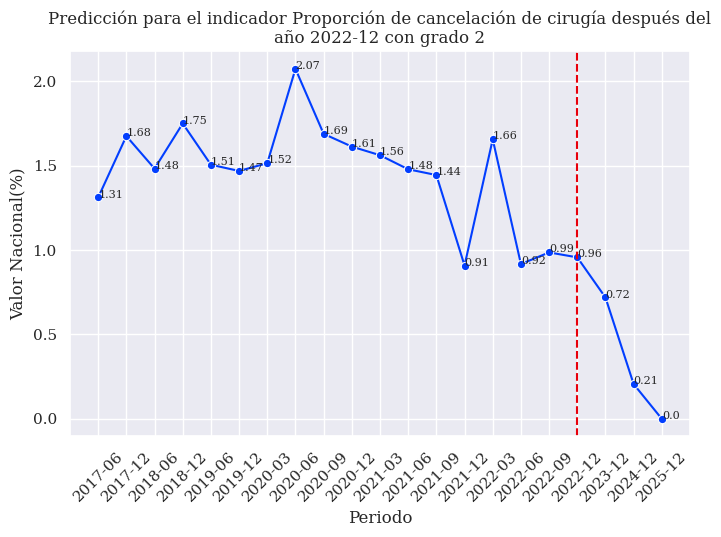

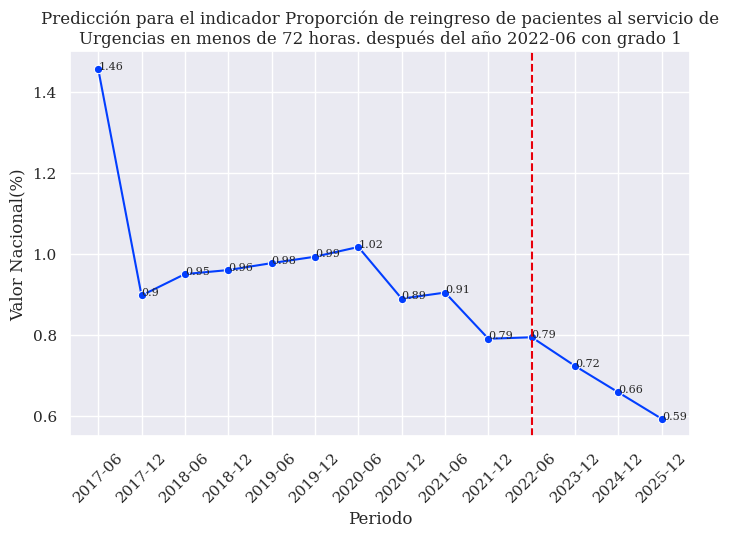

In [27]:
for indicador in indicador_proporciones:
    indicador_nacional=df_proporciones_se[df_proporciones_se["Indicador"]==indicador]
    indicador_nacional=indicador_nacional[['Indicador','Factor','UnidadMedida','Periodo','Numerador','Denominador']].groupby(['Indicador','UnidadMedida','Factor','Periodo']).sum().reset_index()
    indicador_nacional['Valor Nacional(%)']=(indicador_nacional['Numerador']/indicador_nacional['Denominador'])*indicador_nacional['Factor']
    x=indicador_nacional['Periodo']
    x_inicial=pd.to_datetime(x, format='%Y-%m-%d',errors='coerce')
    y=indicador_nacional['Valor Nacional(%)']

    x=pd.to_datetime(x, format='%Y-%m-%d',errors='coerce')
    x=x.dt.year
    step=1
    if x.groupby(x).count().iloc[0]==-1:
        for i in range(0,len(x),2):
            fecha=x.loc[i:i+1]
            x.loc[i]=fecha.loc[i]+0.5
        step=0.5
    años=3
    periodo=x.iloc[len(x)-1]
    i=0
    grado=grados[grados['Indicador']==indicador]['Grado'].iloc[0]
    
    valores_predecidos=pd.DataFrame(columns=['Indicador','UnidadMedida','Factor','Periodo','Numerador','Denominador','Valor Nacional(%)'])
    while i<años:
        i+=step
        periodo=periodo+step
        coef=np.polyfit(x, y, grado)
        p=np.polyval(coef,periodo)
        if p<0:# si la prediccion es negativa se pone en 0
            p=0
            
        periodostr=''
        if periodo-int(periodo)==0:
            periodostr=str(int(periodo))+'-12'
        else:
            periodostr=str(int(periodo))+'-06'
        indicador_predecido=pd.DataFrame({
            'Indicador':indicador,
            'UnidadMedida':'Porcentaje',
            'Factor':100,
            'Periodo':periodostr,
            'Numerador':np.nan,
            'Denominador':np.nan,
            'Valor Nacional(%)':p
        }, index=[0])
        valores_predecidos=valores_predecidos.append(indicador_predecido, ignore_index=True)
    
    indicador_nacional=indicador_nacional.append(valores_predecidos, ignore_index=True)
   
    periodo=x_inicial.iloc[len(x_inicial)-1]
    if int(periodo.month)==12:
        periodo=str(int(periodo.year))+'-12'
    else:
        periodo=str(int(periodo.year))+'-06'
    plt.figure(figsize=(8, 5))
    title='Predicción para el indicador '+str(indicador)+' después del año '+str(periodo)+' con grado '+str(grado)
    plt.title('\n'.join(wrap(title,80)))
    sns.lineplot(x='Periodo', y='Valor Nacional(%)',data=indicador_nacional,marker='o')
    plt.axvline(x=str(periodo), color='r', linestyle='--')
    plt.xticks(rotation=45)
    font = {'family': 'serif',
            'weight': 'normal',
            'size': 8}

    for index, row in indicador_nacional.iterrows():
        plt.text(row['Periodo'], row['Valor Nacional(%)'], str(round(row['Valor Nacional(%)'],2)), ha='left',fontdict=font)
    plt.show()

Como vemos estoso dos indicadores tienen un comportamiento favorable para el dominio de seguridad en la salud.

De la unica tasa en la cual podemos concluir un comportamiento es en la Tasa de incidencia de Infeccion del Trcto Urinario, la cual tiene un comportamiento decreciente hasta alcnazar un minimo en el año 2015 y luego empieza a crecer, lo que quiere decir que para los periodos mas recientes se ha incrementado la incidencia de esta enfermedad por lo que afecta la seguridad en la salud de los colombianos.


```python


## Predecir para todos los indicadores de tasas

In [28]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
grados=pd.DataFrame(columns=['Indicador','Grado','Error total'])
for indicador in indicadores_tasas:
    indicador_nacional=df_tasas_se[df_tasas_se["Indicador"]==indicador]
    indicador_nacional=indicador_nacional[['Indicador','Factor','UnidadMedida','Periodo','Numerador','Denominador']].groupby(['Indicador','UnidadMedida','Factor','Periodo']).sum().reset_index()
    indicador_nacional['Valor Nacional()']=(indicador_nacional['Numerador']/indicador_nacional['Denominador'])*indicador_nacional['Factor']
    x=indicador_nacional['Periodo']
    y=indicador_nacional['Valor Nacional()']
    x=pd.to_datetime(x, format='%Y-%m-%d',errors='coerce')
    x=x.dt.year
    a=x.groupby(x).count()
    i=-1
    add=0
    for index, value in x.iteritems():
        if i==-1 or i==value:
            x.iloc[index]=x.loc[index]+add
            add+=(1/float(a.loc[value]))
            i=value
            continue
        i=value
        add=(1/float(a.loc[value]))
    x_test=x.iloc[len(x)-1]
    y_test=y.iloc[len(y)-1]
    x_train=x.drop(len(x)-1)
    y_train=y.drop(len(x)-1)

    errorsMSE=pd.Series(dtype=float)
    errors=pd.Series(dtype=float)
    for i in range(0,59):
        periodo=x_test# x que se va a predecir
        coef=np.polyfit(x_train, y_train, i)# polino del grado i
        p=np.polyval(coef,periodo)# prediccion con el polinomio del grado i
        if p<0:# si la prediccion es negativa se pone en 0
            p=0
        if p>100:# si la prediccion es mayor a 100 se pone en 100
            p=99.99
        
        y_pred=pd.Series(dtype=float)# serie de prediccion
        for index, value in x_train.iteritems():# se recorre la serie de entrenamiento
            y_pred.loc[index]=np.polyval(coef,value)# se predice cada valor de la serie de entrenamiento
        MSE=(sum((y_train-y_pred)**2))/len(y_train)# error cuadratico medio
        errorsMSE.loc[i]=MSE# se guarda el error en la serie de errores
        errors.loc[i]=abs(p-y_test)# se guarda el error en la serie de errores

    errorTotal=errorsMSE+errors
    grados=grados.append({'Indicador':indicador,'Grado':errorTotal.idxmin(),'Error total':min(errorTotal)}, ignore_index=True)
grados

/tmp/ipykernel_13839/1538729199.py:18: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  x.iloc[index]=x.loc[index]+add
/home/jhonsvzb/Documentos/Proyectos/Salud en Colombia/case.quality_of_health_in_Colombia/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jhonsvzb/Documentos/Proyectos/Salud en Colombia/case.quality_of_health_in_Colombia/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jhonsvzb/Documentos/Proyectos/Salud en Colombia/case.quality_of_health_in_Colombia/venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


,Indicador,Grado,Error total
0,Tasa de caída de pacientes en el servicio de h...,2,0.820003
1,Tasa de caída de pacientes en el servicio de u...,1,0.191411
2,Tasa de caída de pacientes en el servicio de c...,0,0.014013
3,Tasa de caída de pacientes en el servicio de A...,0,0.000148
4,Tasa de Incidencia de Infección del Torrente S...,0,0.290554
5,Tasa de Incidencia de Infección del Tracto Uri...,0,0.349134
6,Tasa de Incidencia de Neumonía Asociada a Vent...,2,0.348840


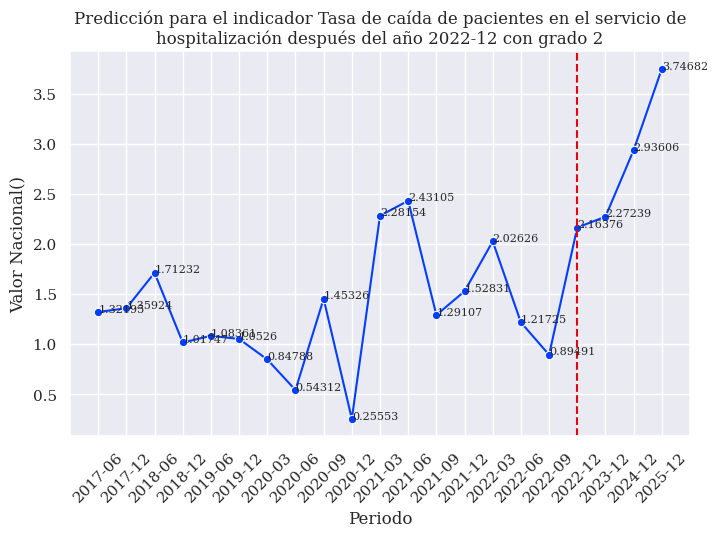

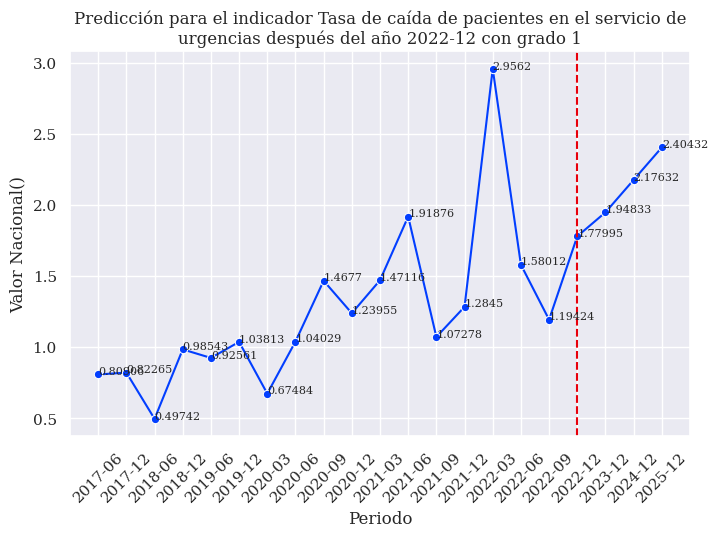

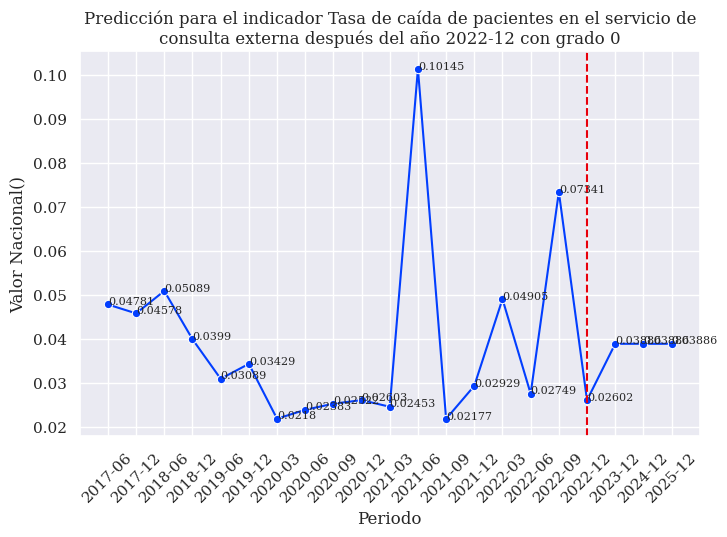

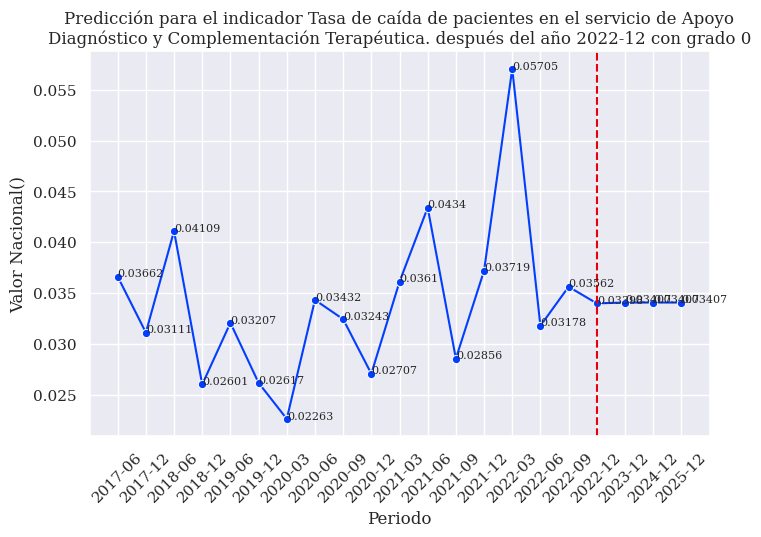

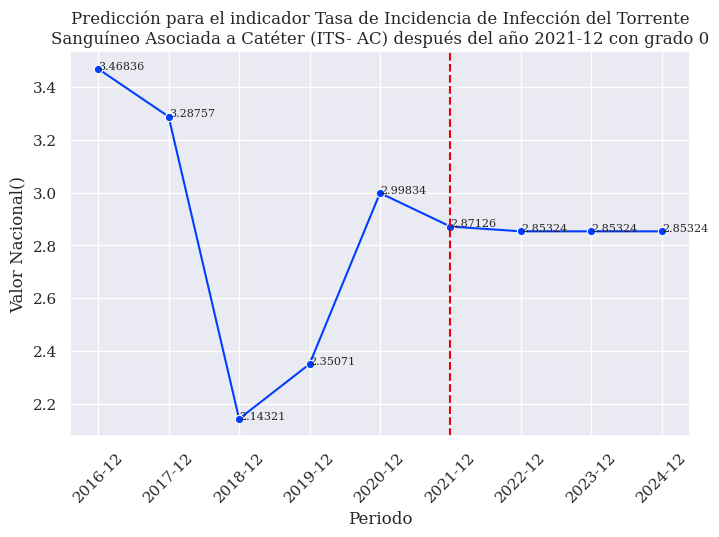

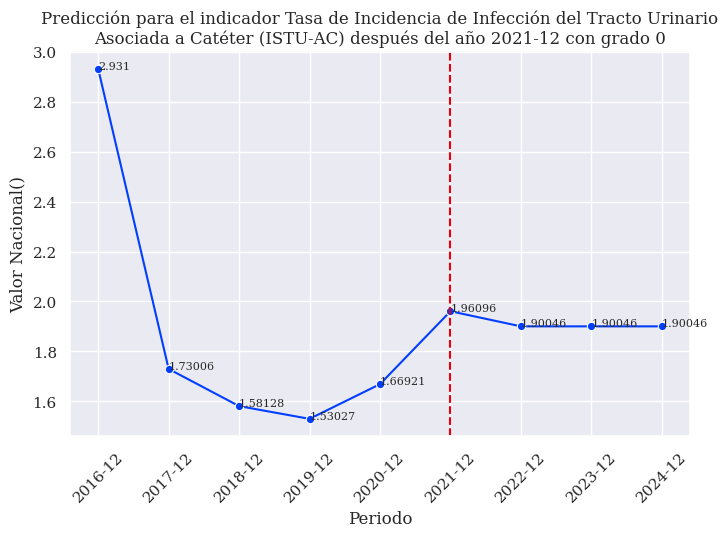

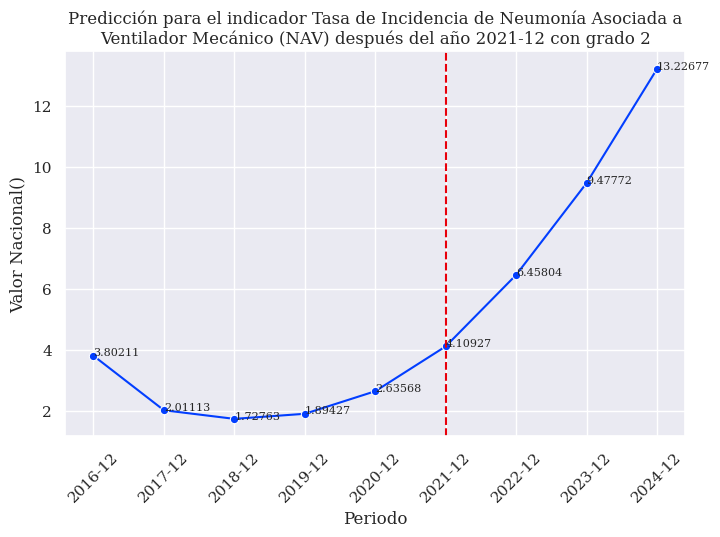

In [29]:
for indicador in indicadores_tasas:
    indicador_nacional=df_tasas_se[df_tasas_se['Indicador']==indicador]
    indicador_nacional=indicador_nacional[['Indicador','Factor','UnidadMedida','Periodo','Numerador','Denominador']].groupby(['Indicador','UnidadMedida','Factor','Periodo']).sum().reset_index()
    indicador_nacional['Valor Nacional()']=(indicador_nacional['Numerador']/indicador_nacional['Denominador'])*indicador_nacional['Factor']
    x=indicador_nacional['Periodo']
    x_inicial=pd.to_datetime(x, format='%Y-%m-%d',errors='coerce')
    y=indicador_nacional['Valor Nacional()']

    x=pd.to_datetime(x, format='%Y-%m-%d',errors='coerce')
    x=x.dt.year
    step=1
    if x.groupby(x).count().iloc[0]==-1:
        for i in range(0,len(x),2):
            fecha=x.loc[i:i+1]
            x.loc[i]=fecha.loc[i]+0.5
        step=0.5
    años=3
    periodo=x.iloc[len(x)-1]
    i=0
    grado=grados[grados['Indicador']==indicador]['Grado'].iloc[0]
    
    valores_predecidos=pd.DataFrame(columns=['Indicador','UnidadMedida','Factor','Periodo','Numerador','Denominador','Valor Nacional()'])
    while i<años:
        i+=step
        periodo=periodo+step
        coef=np.polyfit(x, y, grado)
        p=np.polyval(coef,periodo)
        if p<0:# si la prediccion es negativa se pone en 0
            p=0
            
        periodostr=''
        if periodo-int(periodo)==0:
            periodostr=str(int(periodo))+'-12'
        else:
            periodostr=str(int(periodo))+'-06'
        indicador_predecido=pd.DataFrame({
            'Indicador':indicador,
            'UnidadMedida':'Porcentaje',
            'Factor':1000,
            'Periodo':periodostr,
            'Numerador':np.nan,
            'Denominador':np.nan,
            'Valor Nacional()':p
        }, index=[0])
        valores_predecidos=valores_predecidos.append(indicador_predecido, ignore_index=True)
    
    indicador_nacional=indicador_nacional.append(valores_predecidos, ignore_index=True)
   
    periodo=x_inicial.iloc[len(x_inicial)-1]
    if int(periodo.month)==12:
        periodo=str(int(periodo.year))+'-12'
    else:
        periodo=str(int(periodo.year))+'-06'
    plt.figure(figsize=(8, 5))
    title='Predicción para el indicador '+str(indicador)+' después del año '+str(periodo)+' con grado '+str(grado)
    plt.title('\n'.join(wrap(title,80)))
    sns.lineplot(x='Periodo', y='Valor Nacional()',data=indicador_nacional,marker='o')
    plt.axvline(x=str(periodo), color='r', linestyle='--')
    plt.xticks(rotation=45)
    font = {'family': 'serif',
            'weight': 'normal',
            'size': 8}

    for index, row in indicador_nacional.iterrows():
        plt.text(row['Periodo'], row['Valor Nacional()'], str(round(row['Valor Nacional()'],5)), ha='left',fontdict=font)
    plt.show()